In [11]:
# Notebook 3: Filtros y efectos básicos en imágenes

# Importamos las librerías necesarias
import cv2 # Importamos OpenCV para procesamiento de imágnes
import numpy as np # Importamos numpy para manejo de
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow  # Importamos función para mostrar imágenes en Colab

# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para abrir URLs


In [12]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [13]:
# 1. Suavizado de imagen con filtro gaussiano
# Aplicamos con filtro gaussiano para suavizar la imagen (kernel de 5x5)
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0) #

In [14]:
# 2. Filtro de desenfoque medio
# Aplicamos un filtro de promedio para suavizar la imagen (kernel de 5x5)
average_blur = cv2.blur(image_rgb, (5, 5))  # (5,5) es el tamaño del kernel

# 3. Filtro de desenfoque mediano
# Aplicamos un filtro de mediana para reducir el ruido (tamaño de ventana 5)
median_blur = cv2.medianBlur(image_rgb, 5)  # 5 es el tamaño de la ventana

# 4. Filtro de desenfoque bilateral
# Este filtro preserva los bordes mientras suaviza las áreas planas
bilateral_blur = cv2.bilateralFilter(image_rgb, 9, 75, 75)  # 9 es el diámetro del vecindario, 75 son sigma color y espacial

# 5. Ajuste de brillo y contraste
# Ajustamos brillo y contraste usando transformación lineal alpha*img + beta
alpha = 1.5  # Factor de contraste (>1 aumenta, <1 disminuye)
beta = 30    # Factor de brillo (>0 aumenta, <0 disminuye)
adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)  # Aplicamos la transformación

# 6. Ecualización de histograma (en escala de grises)
# Convertimos a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Aplicamos ecualización de histograma para mejorar el contraste
equalized = cv2.equalizeHist(gray_image)

# 7. Filtro Laplaciano
# Aplicamos el filtro Laplaciano para detectar bordes
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F) # Aplicamos el filtro a la imagen en escala de grises
laplacian = np.uint8(np.absolute(laplacian)) # Convertimos a uint8 para visualización

# 8. Filtro Sobel
# Aplicamos filtros Sobel en direcciones x e y
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5) # Sobel en direccion x
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5) # Sobel en direccion y
# Combinamos los resultados de Sobel x e y
sobel_combined = cv2.addWeighted(np.absolute(sobelx), 0.5, np.absolute(sobely), 0.5, 0) # Combinamos los resultados de Sobel x e y

# 9. Filtro de Realce (Sharpen)
# Definimos un kernel para realzar (sharpening)
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]]) # Kernel para realzar
# Aplicamos el kernel a la imagen original
sharpened = cv2.filter2D(image_rgb, -1, kernel_sharpening) # Aplicamos el kernel a la imagen

# 10. Transformación de Canny
# Aplicamos la detección de bordes con el algoritmo de Canny
canny_edges = cv2.Canny(gray_image, 100, 200) # 100 y 200 son los umbrales mínimo y máximo

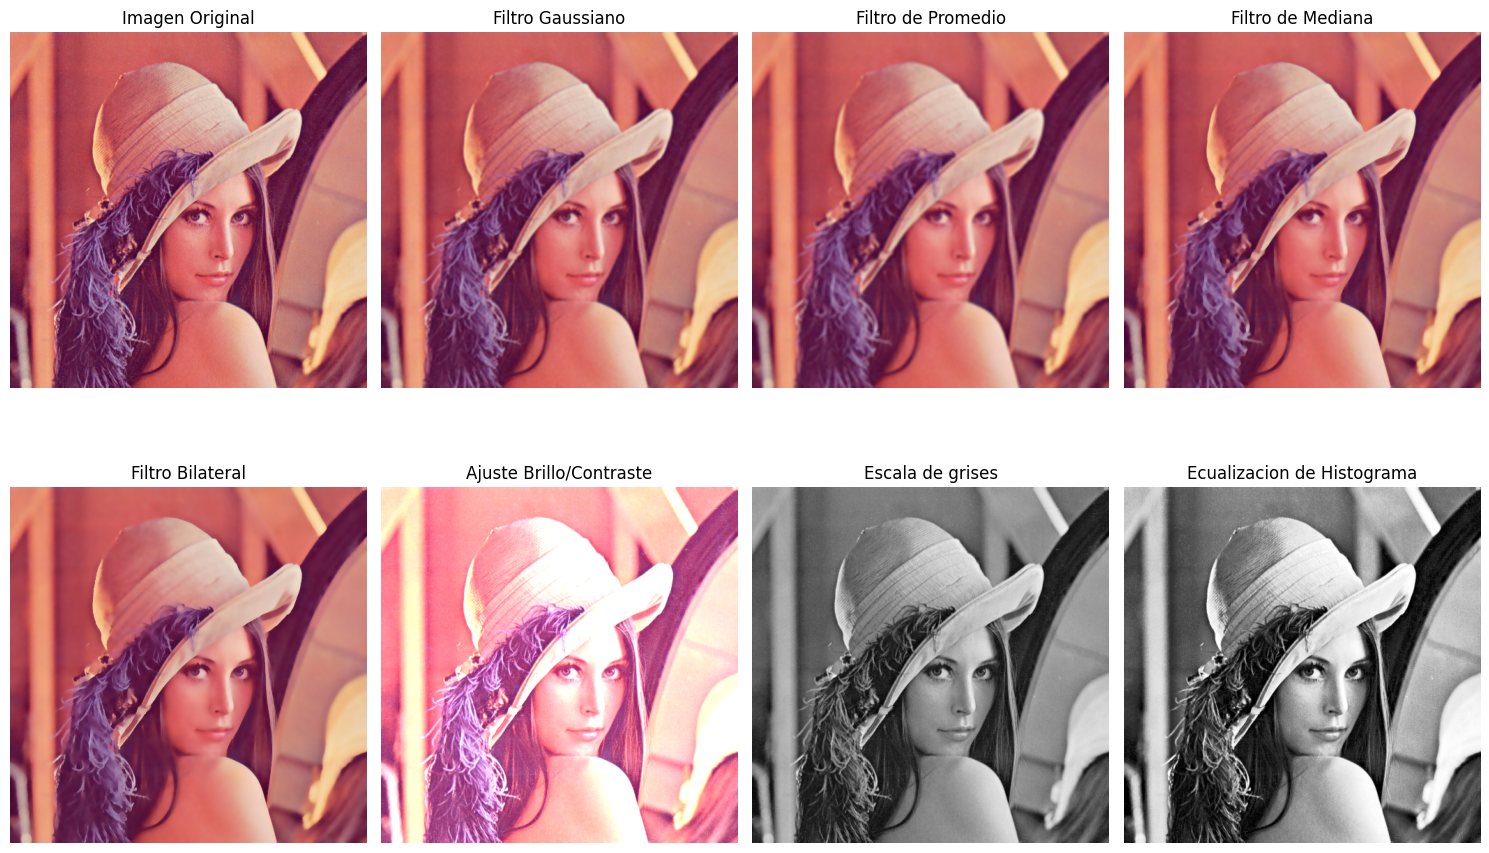

/tmp/ipython-input-2425266588.py:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0, 256]) # Calculamos y mostramos el histograma
/tmp/ipython-input-2425266588.py:68: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 2566, [0, 256])


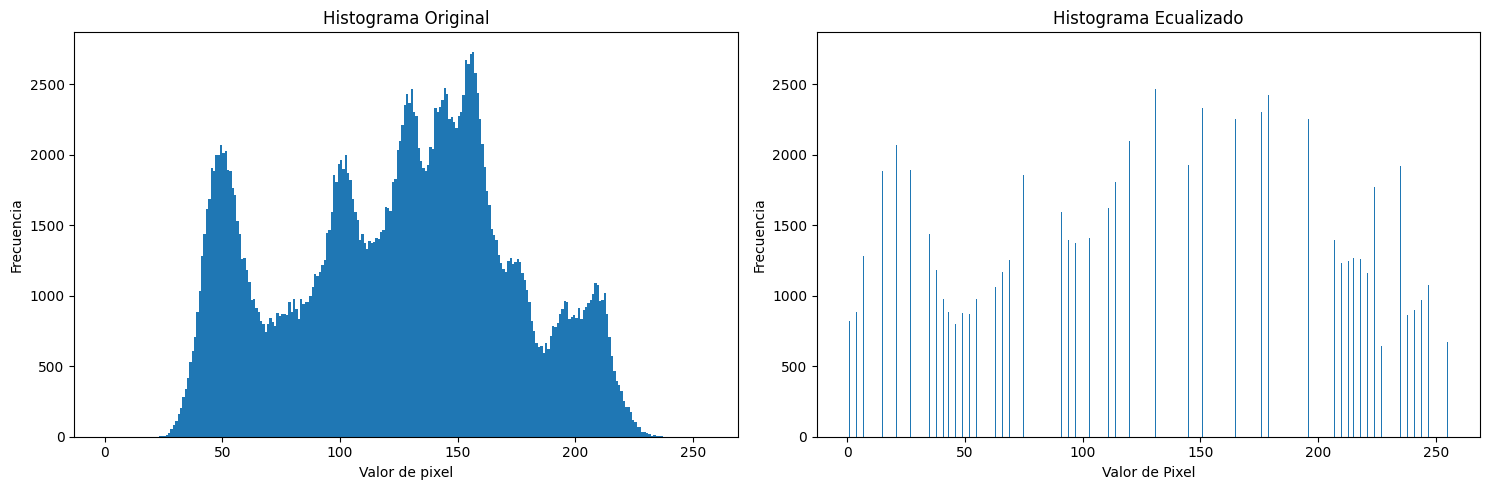

In [15]:
# Visualizacion de todos los filtro
plt.figure(figsize=(15, 10)) # Creamos una figura con tamamo especifico

# Imagen original
plt.subplot(2, 4, 1) # Creamos un subplot en la posicion 1
plt.title('Imagen Original') # Anadimos un titulo
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

# Imagen con filtro gaussiano
plt.subplot(2, 4, 2) # Creamos un subplot en la posicion 2
plt.title('Filtro Gaussiano') # Anadmos un titulo
plt.imshow(blurred_image) # Mostramos la iamgen con filtro gaussiano
plt.axis('off') # Ocultamos los ejes

# Imagen con filtro de promedio
plt.subplot(2, 4, 3) # Creamos un subplot en la posicion 3
plt.title('Filtro de Promedio') # Anadimos un titulo
plt.imshow(average_blur) # Mostramos la imagen con filtro de promedio
plt.axis('off') # Ocultamos los ejes

# Imagen con filtro de mediana
plt.subplot(2, 4, 4) # Creamos un subplot en la posicion 4
plt.title('Filtro de Mediana') # Anadimos un titulo
plt.imshow(median_blur) # Mostramos la imagen con filtro de mediana
plt.axis('off') # Ocultamos los ejes

# Imagen con filtro bilateral
plt.subplot(2, 4, 5) # Creamos un subplot en la posicion 5
plt.title('Filtro Bilateral') # Anadimos un titulo
plt.imshow(bilateral_blur) # Mostramos la iamgen con filtro bilateral
plt.axis('off')  #Ocultamos los ejes

# Imagen con ajuste de brillo y contraste
plt.subplot(2, 4, 6 ) # Creamos un subplot en la posicion 6
plt.title('Ajuste Brillo/Contraste') # Anadios un titulo
plt.imshow(adjusted) # Mostramos la imagen con adjusto de brillo y contraste
plt.axis('off')

# Imagen original en escala de grises
plt.subplot(2, 4, 7)
plt.title('Escala de grises')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Imagen con ecualizacion de histograma
plt.subplot(2, 4, 8)
plt.title('Ecualizacion de Histograma')
plt.imshow(equalized, cmap='gray') # Mostramos la imagen
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualizacion de histogramas
plt.figure(figsize=(15, 5))

# Histograma de la imagen original en escala de grises
plt.subplot(1, 2, 1)
plt.title('Histograma Original')
plt.hist(gray_image.ravel(), 256, [0, 256]) # Calculamos y mostramos el histograma
plt.xlabel('Valor de pixel')
plt.ylabel('Frecuencia') # Etiqueta eje Y

# Histograma de la imagen ecualizada
plt.subplot(1, 2, 2)
plt.title('Histograma Ecualizado')
plt.hist(equalized.ravel(), 2566, [0, 256])
plt.xlabel('Valor de Pixel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

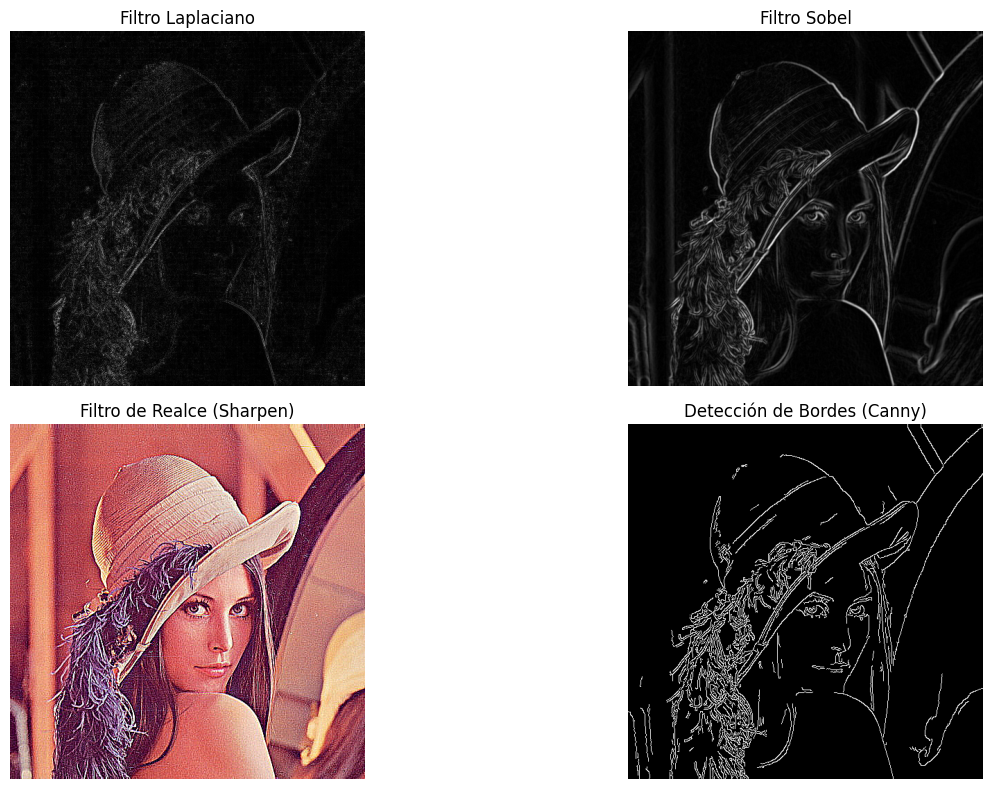

In [16]:
# Visualización de los 4 nuevos filtros
plt.figure(figsize=(15, 8))

# Filtro Laplaciano: Realza los bordes detectando cambios rápidos en intensidad. Resalta los contornos
plt.subplot(2, 2, 1)
plt.title('Filtro Laplaciano')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

# Filtro Sobel: Detecta bordes en direcciones específicas (horizontal y vertical), lo que ayuda a identificar formas y estructuras en la imagen
plt.subplot(2, 2, 2)
plt.title('Filtro Sobel')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

# Filtro de Realce: Mejora los bordes y los detalles (los realza)
plt.subplot(2, 2, 3)
plt.title('Filtro de Realce (Sharpen)')
plt.imshow(sharpened)
plt.axis('off')

# Transformación de Canny: Combina suavizado y gradientes para obtener contornos limpios y definidos
plt.subplot(2, 2, 4)
plt.title('Detección de Bordes (Canny)')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
